In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import boto3
import json

%matplotlib inline
plt.style.use('ggplot')

In [45]:
s3 = boto3.resource('s3')
sfp = s3.Bucket("steamforumposts")
"""
for i in range(1,2):
    thread_name = "threads{}.json".format(i)
    post_name = "posts{}.json".format(i)
    sfp.download_file(thread_name, thread_name)
    sfp.download_file(post_name, post_name)
""";

In [3]:
!ls

csgo_notes.json
dota2_notes.json
EDA.ipynb
explore_notes.py
gridsearch.pkl
notes.csv
Plans+TODOs.txt
posts1.json
posts2.json
posts3.json
posts4.json
posts5.json
posts6.json
pubg_notes.csv
pubg_notes.json
README.md
scrape_forums.py
scrape_notes.py
scrape_threads.py
threads1.json
threads2.json
threads3.json
threads4.json
threads5.json
threads6.json
Untitled.ipynb


In [4]:
threads = []
posts = []

for i in range(1,7):
    thread_name = "threads{}.json".format(i)
    post_name = "posts{}.json".format(i)
    threads.extend(json.load(open(thread_name)))
    posts.extend(json.load(open(post_name)))

In [5]:
threads_clean = [thread for thread in threads if thread['content']]

In [6]:
print("before: {}\nafter: {}".format(len(threads), len(threads_clean)))

before: 35660
after: 34174


In [7]:
thread_df = pd.DataFrame(threads_clean)
post_df = pd.DataFrame(posts)
thread_df.head()

,author_id,content,game_id,posted_on,replies,thread_id,title
0,NickYgeorgE,IM SO SICK OF THE AWP ITS LIKE THEY ARE FLIPPI...,730,1461978067,57,364040166678331371,AWP IS SO OP!!!!
1,Jellypuff,"I know, casual is a weird place full of space ...",730,1387400322,3,648814841520311303,Casual-Competetive tips aka how to counter-act...
2,DeadShot2213,when i click play in dota 2 the game crashs :/,570,1412410583,9,616189742837509796,problem
3,OnECliicker,??,730,1471992571,8,361798516962708171,Will the Cheat problem never be fixed in this ...
4,tannerman46,Why do you never build multiple mechanisms? I ...,570,1415424960,3,620696522141793595,Multiple Mechanisms


In [8]:
post_df.head()

,author,author_id,content,response_number,thread_id,time
0,✪ Lightweight fuckboy,NickYgeorgE,IM SO SICK OF THE AWP ITS LIKE THEY ARE FLIPPI...,#0,364040166678331371,1461978067
1,Gäbi de lallish,MrAbuKhalifa,git gud.,#1,364040166678331371,1461978158
2,✪ Lightweight fuckboy,NickYgeorgE,NO U NERD,#2,364040166678331371,1461978191
3,Xen (prayforscoot2017),cringekidnumber32323,yes you silver,#3,364040166678331371,1461978200
4,✪ Lightweight fuckboy,NickYgeorgE,NO U NERD,#4,364040166678331371,1461978245


In [9]:
thread_df.posted_on = pd.to_datetime(thread_df.posted_on, unit="s")
post_df.time = pd.to_datetime(post_df.time, unit="s")

In [10]:
post_df.response_number.unique()

array(['#0', '#1', '#2', ..., '#42896', '#42897', '#42898'], dtype=object)

In [11]:
post_df.response_number = post_df.response_number.str[1:].astype(int)

In [12]:
post_df = pd.merge(post_df, thread_df[['thread_id','game_id']], on='thread_id')

In [13]:
thread_df.replies.value_counts().sort_index()

3        3310
4        2914
5        2553
6        2310
7        1989
8        1813
9        1518
10       1414
11       1216
12       1090
13        974
14        856
15        769
16        685
17        649
18        582
19        566
20        530
21        445
22        437
23        396
24        368
25        348
26        337
27        315
28        238
29        289
30        235
31        210
32        236
         ... 
854         1
912         1
917         1
956         1
1021        1
1034        1
1073        1
1113        1
1141        1
1382        1
1412        1
1514        1
1528        1
1557        1
1568        2
1665        1
1696        2
1909        1
1956        1
2105        1
2963        1
2993        1
2999        1
3482        1
3833        1
7787        1
10519       1
14074       1
17752       1
42882       1
Name: replies, Length: 352, dtype: int64

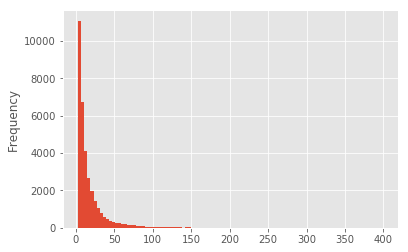

In [14]:
thread_df.replies[thread_df.replies < 400].plot.hist(bins=100)

In [15]:
thread_df.head()

,author_id,content,game_id,posted_on,replies,thread_id,title
0,NickYgeorgE,IM SO SICK OF THE AWP ITS LIKE THEY ARE FLIPPI...,730,2016-04-30 01:01:07,57,364040166678331371,AWP IS SO OP!!!!
1,Jellypuff,"I know, casual is a weird place full of space ...",730,2013-12-18 20:58:42,3,648814841520311303,Casual-Competetive tips aka how to counter-act...
2,DeadShot2213,when i click play in dota 2 the game crashs :/,570,2014-10-04 08:16:23,9,616189742837509796,problem
3,OnECliicker,??,730,2016-08-23 22:49:31,8,361798516962708171,Will the Cheat problem never be fixed in this ...
4,tannerman46,Why do you never build multiple mechanisms? I ...,570,2014-11-08 05:36:00,3,620696522141793595,Multiple Mechanisms


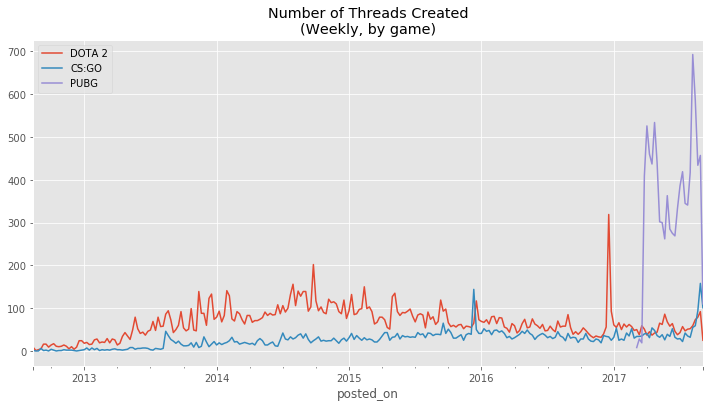

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
for gameid, df in thread_df.groupby('game_id'):
    df.resample('w', on = 'posted_on').agg({'author_id':len}).plot.line(ax=ax)
ax.legend(['DOTA 2', 'CS:GO', "PUBG"])
ax.set_title("Number of Threads Created\n(Weekly, by game)")

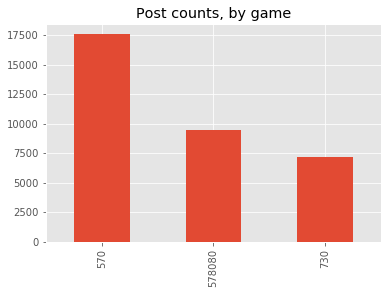

In [17]:
ax = thread_df.game_id.value_counts().plot.bar()
ax.set_title("Post counts, by game")

In [18]:
aggdf = post_df.groupby('author_id').agg({'content':len, 'response_number':lambda x: (x == 0).mean()})

In [19]:
post_df.shape

(822196, 7)

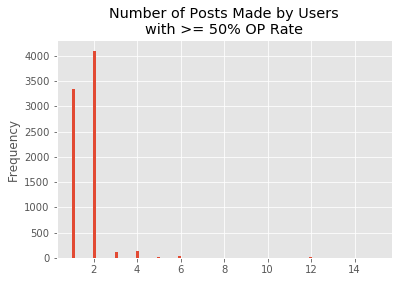

In [20]:
ax = aggdf.content[aggdf.response_number >= .5].plot.hist(bins=100)
ax.set_title("Number of Posts Made by Users\nwith >= 50% OP Rate")

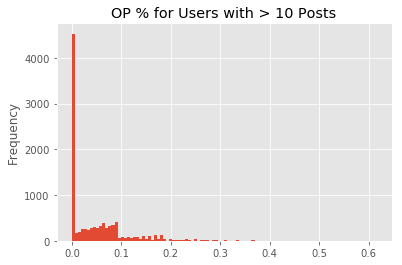

In [21]:
ax = aggdf.response_number[aggdf.content > 10].plot.hist(bins=100)
ax.set_title("OP % for Users with > 10 Posts")

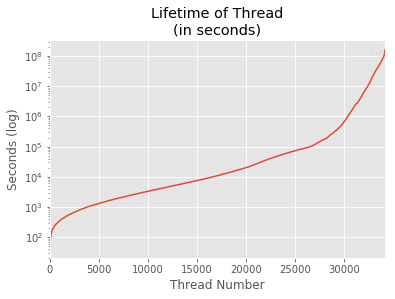

In [22]:
durationdf = post_df.groupby('thread_id').agg({'time':lambda x: x.max() - x.min()})
durationdf = durationdf.sort_values('time')
durationdf['nums'] = range(len(durationdf))
durationdf.time = durationdf.time.astype('timedelta64[s]')
ax = durationdf.plot.line('nums', 'time', logy=True)
ax.set_title("Lifetime of Thread\n(in seconds)")
ax.set_ylabel("Seconds (log)")
ax.set_xlabel("Thread Number")
ax.legend([])

In [23]:
#Not as useful without more data
aliasdf = post_df.groupby('author_id').agg({'author':lambda x: len(x.unique())})
aliasdf.describe()

,author
count,183324.000000
mean,1.004768
std,0.079541
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


In [24]:
thread_df[thread_df.replies > 10000]

,author_id,content,game_id,posted_on,replies,thread_id,title
2063,hunter_arg,Release Notes for 12/8/2015 8 DEC 2015 - [WINT...,730,2015-12-09 10:26:03,10519,494631873667474730,New update (12/8/2015)
5397,killahinstinct_,As communicated by one of the CSGO developers:...,730,2015-12-23 14:21:56,14074,458604254422114553,Corrections to ranking system
9962,exitparadox,Rate the inventory of the person above you by ...,730,2016-07-22 16:08:36,42882,359543951717735704,Rate The CS:GO Inventory Of The Person Above You!
25837,killahinstinct_,Competitive matchmaking cooldowns For more inf...,730,2014-11-14 10:28:56,17752,624075036318156108,Competitive matchmaking cooldowns - information


In [25]:
len(post_df)

822196

In [26]:
len(thread_df)

34174

In [27]:
dfs = []
for name in ['csgo','dota2','pubg']:
    d = json.load(open(name+'_notes.json'))
    df = pd.DataFrame([{'date':patch['post_date'], 'change':" ".join([change['change'] for change in patch['content']])} for patch in d])
    df['game'] = name
    dfs.append(df)
notes_df = pd.concat(dfs, axis = 0)
notes_df.head()

,change,date,game
0,shipping more changes to pistols with the goal...,2017.08.17,csgo
1,shipping initial changes to pistols with the g...,2017.08.07,csgo
2,engraved the krakow 2017 champions on the in g...,2017.08.01,csgo
3,updated signatures of players where the mistak...,2017.07.10,csgo
4,fixed bug with new sound system where a buzzin...,2017.07.07,csgo


In [28]:
notes_df.date.replace('1)', '4/20/17', inplace = True)
notes_df.date.replace('12/13)', '6/21/17', inplace = True)
notes_df.date = pd.to_datetime(notes_df.date)
notes_df[notes_df.game == 'pubg'].head()

,change,date,game
0,Optimized fences doors and windows Optimized v...,2017-08-03,pubg
1,Characters may seem like they are shaking when...,2017-03-23,pubg
2,Fixed and improved compass readability The sou...,2017-04-11,pubg
3,The motorbike leans slightly to the right when...,2017-04-20,pubg
4,Localization of VSS and Vector for few country...,2017-05-25,pubg


In [29]:
len(notes_df)

1060

In [30]:
notes_df.to_csv("notes.csv")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from Stemmer import Stemmer
stemmer = Stemmer("en")

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

def get_highest_sim_score(post_tfidf, patches_tfidf):
    if len(patches_tfidf.shape) == 1:
        patches_tfidf = patches_tfidf.reshape(1, -1)
    return np.max((post_tfidf * patches_tfidf).sum(axis = 1)
                  / (np.linalg.norm(post_tfidf) * np.linalg.norm(patches_tfidf, axis = 1)))
    
def calc_sim_score(series):
    patches = x_trans_df[(x_trans_df.index > series.time + pd.to_timedelta(n_weeks_start, 'w')) & 
                         (x_trans_df.index < series.time + pd.to_timedelta(n_weeks_end, 'w'))]
    
    if len(patches) == 0:
        return -2
    else:
        x = tfidf.transform([series.content])
        if x.astype(bool).sum() == 0:
            return -1
        if x.astype(bool).sum() < min_matches or x.astype(bool).sum() > max_matches:
            return 0
        score = get_highest_sim_score(x.toarray(), patches.iloc[:,2:].values)

        return score
    
notes_transformed = []
posts_transformed = []
#gridsearch = []
stopwords = set(ENGLISH_STOP_WORDS)
stopwords.update(['run', 'runs', 'running', 'patch','update','updates',
                  'new','news','sound','sounds','date','Date','Dates',
                  'dates','ping','pings','vac','VAC','ban','Ban','BAN',
                  'banned','Banned','dota','DoTA','DOTA','Dota','cs','CS',
                  'go','GO','pubg','PUBG'] +
                list('1234567890'))

n_weeks_start = 1
n_weeks_end = 4
min_matches = 4
max_matches = 20

for gameid, gamename, thresh in zip([570, 730, 578080], ["dota2","csgo","pubg"], [.3, .3, .5]):
    print(gamename)
    notes_sub = notes_df[notes_df.game == gamename]
    posts_sub = post_df[post_df.game_id == gameid]
    tfidf = StemmedTfidfVectorizer(max_df = thresh, stop_words=stopwords)
    x_trans = tfidf.fit_transform(notes_sub.change.values)
    x_trans_df = pd.DataFrame(x_trans.todense(), columns = tfidf.get_feature_names())
    x_trans_df = pd.concat([notes_sub, x_trans_df], axis = 1)
    x_trans_df.set_index('date', inplace = True)
    notes_transformed.append(x_trans_df)
    posts_sub['simscore'] = posts_sub.apply(calc_sim_score, axis = 1)
    posts_transformed.append(posts_sub)
    
"""Gridsearch to see what 'highly rated' posts look like under various params
    if thresh == .5:
        for n_weeks_start in [0,1,2]:
            for n_weeks_end in [3,4,6]:
                for min_matches in [1,2,4,8]:
                    print("Grid searching for {}, {}, {}".format(n_weeks_start, n_weeks_end, min_matches))
                    simscores = posts_sub.apply(calc_sim_score, axis = 1)
                    simscores = pd.DataFrame(simscores, columns = ['simscore'])
                    x1 = "start:{},stop:{},min:{}".format(n_weeks_start, n_weeks_end, min_matches)
                    x2 = simscores.describe(percentiles=np.arange(100)/100)
                    x3 = pd.concat([posts_sub, simscores], axis = 1).sort_values('simscore', ascending=False).head(20).content
                    gridsearch.append((x1, x2, x3))
""";

dota2


C:\Users\John\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
C:\Users\John\Anaconda3\lib\site-packages\ipykernel\__main__.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


csgo


In [48]:
for post in posts_transformed[0].sort_values('simscore', ascending = False).content.head(50):
    print(post+"\n\n\n")

Items* Dragon Lance strength reduced from 14 to 13* Infused Raindrop cooldown increased from 4 to 6* Diffusal Blade cooldown increased from 2 to 4Heroes* Outworld Devourer base armor reduced by 1.5* Shadow Demons's Shadow Poison initial damage reduced from 50 to 26/34/42/50* Bat Rider's Flamebreak cooldown increased from 14 to 17* Drow base damage reduced by 4* Kunkka's Torrent damage reduced from 120/180/240/300 to 75/150/225/300* Eldar Titan's Echo Stomp channel time increased from 1.2 to 1.3* Oracle base damage reduced by 6* Morphling intelligence gain reduced from 1.5 to 1.1* Mirana's Aghs upgrade Starstorm cooldown increased from 8 to 9* Faceless Void's Time Dilation now only freezes abilities that are on cooldown, rather than also affecting abilities cast afterwards* Faceless Void's Time Dilation slow per frozen ability increased from 8% to 10%*  Arc Warden's Tempest Double gold and XP bounty increased from 140 to 160* Juggernaut base damage reduced by 2* Axe's Counter Helix dama

In [32]:
posts_sub.head(63).tail(2)

,author,author_id,content,response_number,thread_id,time,game_id
181,Scrumdiddlyumptious,cinnamintspice,Norton thinks everything new is a virus.,12,810939351397052946,2013-11-03 04:47:35,570
182,Ral,76561197983235241,Valve is punishing us for Diretide spam.,13,810939351397052946,2013-11-03 04:57:53,570


In [33]:
posts_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418728 entries, 62 to 822179
Data columns (total 7 columns):
author             418728 non-null object
author_id          418728 non-null object
content            418728 non-null object
response_number    418728 non-null int32
thread_id          418728 non-null int64
time               418728 non-null datetime64[ns]
game_id            418728 non-null int64
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 24.0+ MB


In [35]:
x_trans_df.head(70)

,change,game,00,000,01,02,03,04,05,06,...,zeus,zhaohui,zhejiang,zhengzheng,zombi,zone,zoom,zotac,zsmj,zuus
date,,,,,,,,,,,,,,,,,,,,,
"(2017-08-19 00:00:00, 0.0)",Odobenus Footman in Crypt of the Odobenus Legi...,dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.504673,0.000000,0.0,0.0,0.0
"(2017-08-18 00:00:00, 0.022200857881410515)",Added Siltbreaker Act II. Added Siltbreaker ac...,dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.030347,0.000000,0.0,0.0,0.0
"(2017-08-16 00:00:00, 0.0)","Added new Autographs, Dendi 2017. Fixed Daedal...",dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
"(2017-08-15 00:00:00, 0.2199609230575357)","The International 2017 Battle Pass, Levels & ...",dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
"(2017-08-11 00:00:00, 0.0)",Unknown purpose of adding PlayerResource and ...,dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
"(2017-08-10 00:00:00, 0.0)","Added autographs for Op, Abed and Xxs and Jos...",dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
"(2017-08-09 00:00:00, 0.0)",Support has been added for the autographs giv...,dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
"(2017-08-08 00:00:00, 0.0)",TI7 Matches now have MVP data. Pushed the Tr...,dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
"(2017-08-07 00:00:00, 0.0)",Fixed a bug with in-game predictions that wou...,dota2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [37]:
notes_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 882
Data columns (total 3 columns):
change    883 non-null object
date      883 non-null datetime64[ns]
game      883 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 27.6+ KB
